# **Introduction to Probability**

**Definition:**
Probability measures the **likelihood of occurrence** of an event.

* Range: 0 ≤ P(E) ≤ 1
* 0 → impossible event
* 1 → certain event

**Formula (Classical Probability):**

$$P(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}}$$

**Example:**

* Tossing a fair coin, probability of getting **heads**:

$$P(\text{Heads}) = \frac{1}{2} = 0.5$$

In [2]:
import numpy as np

# Simulate 1000 coin tosses
tosses = np.random.choice(['Heads', 'Tails'], size=1000)
prob_heads = np.sum(tosses=='Heads') / 1000
prob_heads


np.float64(0.494)


**Explanation:**

* We simulate random experiments to **estimate probability**
* Probability approaches theoretical value with more trials

---

# **Random Experiments, Sample Space, and Events**

### **Random Experiment**

* An experiment whose outcome **cannot be predicted with certainty**.
* Example: Tossing a coin, rolling a die, drawing a card from a deck.

### **Sample Space (S)**

* The **set of all possible outcomes** of a random experiment.
* Notation: (S)
* Example:

  * Toss a coin → (S = {Heads, Tails})
  * Roll a die → (S = {1,2,3,4,5,6})

### **Event (E)**

* Any **subset of sample space**.
* Example:

  * Roll a die, event “getting an even number” → (E = {2,4,6})

---

In [3]:
import numpy as np

# Sample space for a die
S = np.array([1,2,3,4,5,6])

# Event: getting an even number
E = S[S % 2 == 0]
print("Sample Space:", S)
print("Event (Even Numbers):", E)

# Probability
P_E = len(E)/len(S)
print("Probability of Even Number:", P_E)


Sample Space: [1 2 3 4 5 6]
Event (Even Numbers): [2 4 6]
Probability of Even Number: 0.5


**Explanation:**

* Sample space → all possible outcomes
* Event → favorable outcomes
* Probability → ratio of favorable outcomes to total outcomes

---

# **Types of Events**

Events in probability can be classified based on their relationship with each other:

---

### **1. Independent Events**

* Two events are **independent** if the occurrence of one **does not affect** the probability of the other.
* Formula:
  $$P(A \cap B) = P(A) \cdot P(B)$$
  **Example:**
* Tossing two coins:

  * Event A: First coin is Heads
  * Event B: Second coin is Heads
  * A and B are independent

* Check: $P(A) \cdot P(B) \approx P(A \cap B)$

---

### **2. Dependent Events**

* Two events are **dependent** if the occurrence of one **affects** the probability of the other.
* Example: Drawing 2 cards **without replacement** from a deck:

  * Event A: First card is Ace
  * Event B: Second card is Ace
  * Probability of B changes after A


---

### **3. Mutually Exclusive (Disjoint) Events**

* **Cannot occur together**: $P(A \cap B) = 0$
* Example: Toss a coin → “Heads” and “Tails” are mutually exclusive

---

### **4. Exhaustive Events**

* **Collectively cover the whole sample space**:
  $$P(A_1 \cup A_2 \cup ... \cup A_n) = 1$$
* Example: Toss a coin → {Heads, Tails} are exhaustive
* Example: Roll a die → {1,2,3,4,5,6}

---




In [4]:
### independent events
# Simulate 2 coin tosses
tosses = np.random.choice(['Heads', 'Tails'], size=(10000, 2))
P_A = np.mean(tosses[:,0]=='Heads')
P_B = np.mean(tosses[:,1]=='Heads')
P_A_and_B = np.mean((tosses[:,0]=='Heads') & (tosses[:,1]=='Heads'))
print("Independent Events (Coin Tosses):")
print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A ∩ B) = {P_A_and_B:.4f}")
print(f"P(A) × P(B) = {P_A * P_B:.4f}")
print(f"Are they independent? {abs(P_A_and_B - P_A * P_B) < 0.01}")

print("\n" + "="*50 + "\n")

### dependent events
# Deck of cards simulation - drawing 2 cards without replacement
deck = np.arange(52)
n_simulations = 10000

# Simulate drawing 2 cards without replacement
first_cards = np.random.choice(deck, n_simulations)
second_cards = np.zeros(n_simulations, dtype=int)

for i in range(n_simulations):
    # Remove the first card from the deck for this simulation
    remaining_deck = deck[deck != first_cards[i]]
    second_cards[i] = np.random.choice(remaining_deck)

# Calculate probabilities
P_first_ace = np.mean(first_cards < 4)  # First 4 cards are aces (0,1,2,3)
P_second_ace = np.mean(second_cards < 4)  # Second card is ace
P_both_aces = np.mean((first_cards < 4) & (second_cards < 4))

print("Dependent Events (Drawing 2 Cards Without Replacement):")
print(f"P(First card is Ace) = {P_first_ace:.4f}")
print(f"P(Second card is Ace) = {P_second_ace:.4f}")
print(f"P(Both cards are Aces) = {P_both_aces:.4f}")
print(f"P(First Ace) × P(Second Ace) = {P_first_ace * P_second_ace:.4f}")
print(f"Are they independent? {abs(P_both_aces - P_first_ace * P_second_ace) < 0.01}")



Independent Events (Coin Tosses):
P(A) = 0.5091
P(B) = 0.5023
P(A ∩ B) = 0.2593
P(A) × P(B) = 0.2557
Are they independent? True


Dependent Events (Drawing 2 Cards Without Replacement):
P(First card is Ace) = 0.0770
P(Second card is Ace) = 0.0802
P(Both cards are Aces) = 0.0052
P(First Ace) × P(Second Ace) = 0.0062
Are they independent? True




# **Probability Axioms (Kolmogorov’s Rules)**

**Foundation:** Andrey Kolmogorov formalized **probability theory** using three axioms. These rules apply to **any probability measure**.

---

### **Axiom 1: Non-Negativity**

* Probability of any event is **always non-negative**:
  
  $$P(E) \ge 0$$
  
  **Example:** Tossing a coin → Probability of heads = 0.5 ≥ 0

---

### **Axiom 2: Normalization**

* Probability of the **entire sample space** is 1:
  
  $$P(S) = 1$$
  
* Meaning: **some outcome must occur** in a random experiment
* Example: Rolling a die → sum of probabilities of all outcomes = 1
  
  $$P(1)+P(2)+...+P(6) = 1$$
  

---

### **Axiom 3: Additivity (Mutually Exclusive Events)**

* For **mutually exclusive events** (A) and (B):
  
  $$P(A \cup B) = P(A) + P(B)$$
  
* Generalization for (n) disjoint events:
  
  $$P(A_1 \cup A_2 \cup ... \cup A_n) = P(A_1) + P(A_2) + ... + P(A_n)$$
  

**Example: Rolling a die**

* Event A: Roll a 1 → P(A) = 1/6
* Event B: Roll a 2 → P(B) = 1/6
* A and B are mutually exclusive → P(A ∪ B) = 1/6 + 1/6 = 1/3

---



In [5]:
import numpy as np

die = np.array([1,2,3,4,5,6])
P_A = 1/6  # rolling 1
P_B = 1/6  # rolling 2
P_A_or_B = P_A + P_B
P_A_or_B


0.3333333333333333


# **Conditional Probability**

**Definition:**
Conditional probability measures the **probability of an event occurring given that another event has already occurred**.

* Notation: (P(A|B)) → Probability of event (A) given event (B) has occurred.

**Formula:**
$$
P(A|B) = \frac{P(A \cap B)}{P(B)}, \quad P(B) \neq 0
$$

---

### **Example 1: Dice Roll**

* Experiment: Roll a die
* Event A: Roll an even number → {2,4,6}
* Event B: Roll greater than 3 → {4,5,6}

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{2/6}{3/6} = \frac{2}{3}
$$

**Explanation:**

* ($A \cap B$ = {4,6}) → outcomes that are **even and greater than 3**
* (B = {4,5,6}) → outcomes **greater than 3**
* Probability of A given B → 2/3




In [6]:
import numpy as np

# Sample space: die roll
die = np.array([1,2,3,4,5,6])
# Event A: even
A = die[die % 2 == 0]
# Event B: >3
B = die[die > 3]

# Intersection A ∩ B
A_and_B = np.intersect1d(A, B)

# Conditional probability P(A|B)
P_A_given_B = len(A_and_B) / len(B)
P_A_given_B


0.6666666666666666


# **Bayes’ Theorem**

**Definition:**
Bayes’ Theorem allows us to **update the probability of an event** based on **new evidence**.

* Useful when we know the probability of event B given A, but want probability of A given B.

**Formula:**
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:

* (P(A|B)) → Posterior probability (updated probability of A given B)
* (P(B|A)) → Likelihood (probability of B given A)
* (P(A)) → Prior probability of A
* (P(B)) → Marginal probability of B

---

### **Example: Medical Test**

* Disease prevalence: 1% → (P(D) = 0.01)
* Test accuracy: 99% → (P(+|D) = 0.99)
* False positive rate: 5% → ($P(+|\neg D$) = 0.05)
* Question: Probability of having the disease if test is positive → (P(D|+))

**Calculation:**

$$
P(D|+) = \frac{P(+|D) \cdot P(D)}{P(+|D)\cdot P(D) + P(+|\neg D)\cdot P(\neg D)}
$$

$$
P(D|+) = \frac{0.99 \cdot 0.01}{0.99 \cdot 0.01 + 0.05 \cdot 0.99} \approx 0.17
$$

**Explanation:**

* Even with a positive test, **probability of disease is only 17%** due to low prevalence.




In [7]:
# Given probabilities
P_D = 0.01       # Disease prevalence
P_not_D = 0.99
P_pos_given_D = 0.99
P_pos_given_not_D = 0.05

# Bayes Theorem
P_D_given_pos = (P_pos_given_D * P_D) / (P_pos_given_D*P_D + P_pos_given_not_D*P_not_D)
P_D_given_pos


0.16666666666666669


# **Random Variables (Discrete & Continuous)**

**Definition:**
A **random variable (RV)** is a variable whose value **depends on the outcome of a random experiment**.

* It **assigns numerical values** to outcomes in the sample space.

---

### **Types of Random Variables**

#### **1. Discrete Random Variables**

* Can take **finite or countable values**.
* Examples:

  * Number of heads in 3 coin tosses → {0,1,2,3}
  * Number of cars passing a checkpoint in an hour → {0,1,2,...}


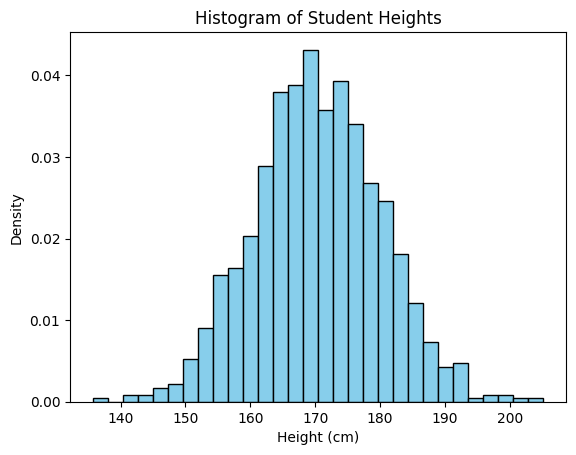

In [8]:
import matplotlib.pyplot as plt

# Heights of 1000 students (Normal distribution)
heights = np.random.normal(loc=170, scale=10, size=1000)

plt.hist(heights, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Histogram of Student Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()


2. Continuous Random Variables

- Can take any value in a range (uncountable).

- Examples:

    - Height of students → [150 cm, 200 cm]

    - Time taken to complete a task → [0, ∞)

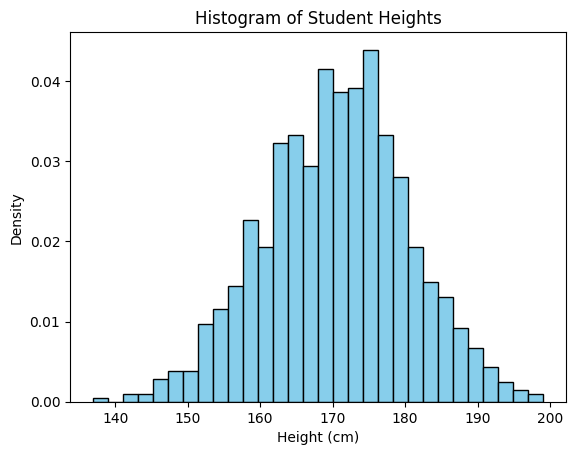

In [9]:
import matplotlib.pyplot as plt

# Heights of 1000 students (Normal distribution)
heights = np.random.normal(loc=170, scale=10, size=1000)

plt.hist(heights, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Histogram of Student Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()


Explanation:

- Continuous random variables → plotted as histogram or density
- Probabilities are area under the curve

# **Uniform Distribution**

**Definition:**
A **uniform distribution** is a probability distribution in which **all outcomes are equally likely**.

* **Discrete Uniform:** Finite number of outcomes with equal probability
* **Continuous Uniform:** Any value within a continuous range is equally likely

---

### **1. Discrete Uniform Distribution**

**Example:** Rolling a fair die

* Sample space: {1, 2, 3, 4, 5, 6}
* Probability of each outcome: ( P(X=x) = 1/6 )





In [10]:
import numpy as np

# Simulate rolling a die 10000 times
rolls = np.random.choice([1,2,3,4,5,6], size=10000)

# Count frequencies
unique, counts = np.unique(rolls, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Outcome: {u}, Probability ≈ {c/10000:.3f}")


Outcome: 1, Probability ≈ 0.164
Outcome: 2, Probability ≈ 0.170
Outcome: 3, Probability ≈ 0.167
Outcome: 4, Probability ≈ 0.164
Outcome: 5, Probability ≈ 0.170
Outcome: 6, Probability ≈ 0.165


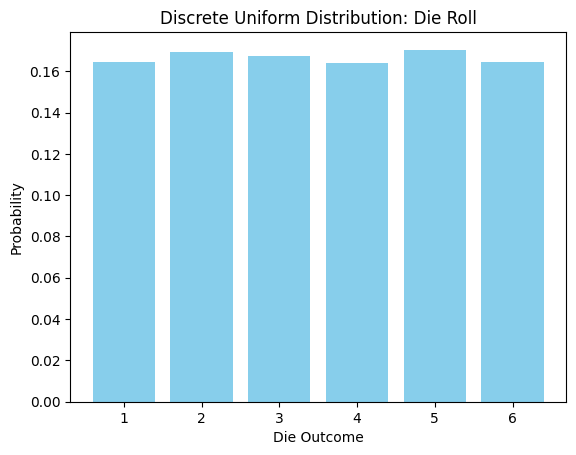

In [11]:
import matplotlib.pyplot as plt

plt.bar(unique, counts/10000, color='skyblue')
plt.xlabel("Die Outcome")
plt.ylabel("Probability")
plt.title("Discrete Uniform Distribution: Die Roll")
plt.show()


Explanation:

- All outcomes equally likely → probability ≈ 1/6

2. Continuous Uniform Distribution

Example: Random number between 0 and 1

- Probability is uniform across the interval [0,1]

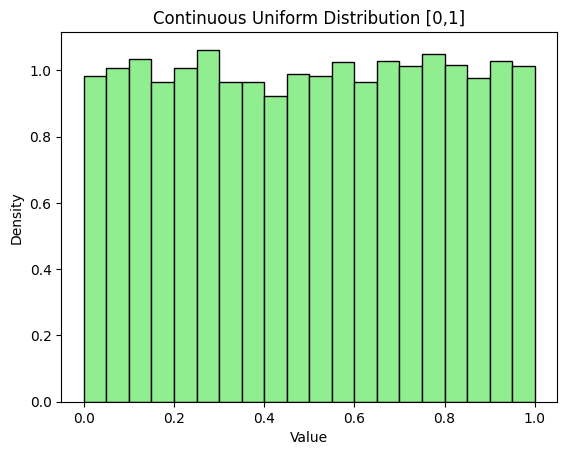

In [12]:
# Continuous uniform between 0 and 1
samples = np.random.uniform(0, 1, size=10000)

plt.hist(samples, bins=20, density=True, color='lightgreen', edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Continuous Uniform Distribution [0,1]")
plt.show()


Explanation:

- Each value in the interval is equally likely

- Area under the histogram ≈ 1 → represents total probability

---

# **Bernoulli Distribution**

**Definition:**
A **Bernoulli distribution** models a **random experiment with only two possible outcomes**:

* Success (1)
* Failure (0)

**Parameter:**

* (p) → probability of success
* (1-p) → probability of failure

**Support:** $$(X \in {0, 1})$$

**PMF (Probability Mass Function):**
$$
P(X=x) =
\begin{cases}
p & \text{if } x=1\
,1-p & \text{if } x=0
\end{cases}
$$

---

### **Example:** Tossing a biased coin

* Probability of heads (success) → 0.7
* Probability of tails (failure) → 0.3



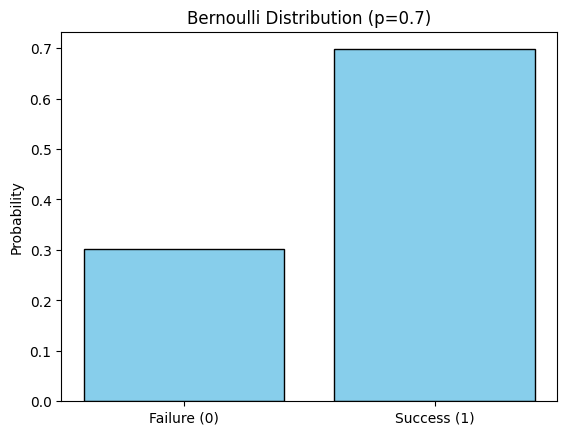

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.7
n_samples = 10000

# Bernoulli samples
samples = np.random.choice([1,0], size=n_samples, p=[p, 1-p])

# Calculate probabilities
values, counts = np.unique(samples, return_counts=True)
probs = counts / n_samples

# Plot
plt.bar(values, probs, color='skyblue', edgecolor='black')
plt.xticks([0,1], ['Failure (0)', 'Success (1)'])
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution (p={p})")
plt.show()


Explanation:

- Outcome 1 → Success (Heads) → probability ≈ 0.7

- Outcome 0 → Failure (Tails) → probability ≈ 0.3

- Simple model for binary outcomes

---

# **Binomial Distribution**

**Definition:**
The **Binomial distribution** models the number of **successes in a fixed number of independent Bernoulli trials**.

* Each trial has:

  * Success probability: (p)
  * Failure probability: (1-p)
* Number of trials: (n)

**PMF (Probability Mass Function):**
$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0,1,2,...,n
$$

Where:

* $(\binom{n}{k} = \frac{n!}{k!(n-k)!})$

---

### **Example:** Tossing a coin 10 times

* Probability of heads (success): (p = 0.5)
* Number of trials: (n = 10)
* Random variable (X) = number of heads in 10 tosses


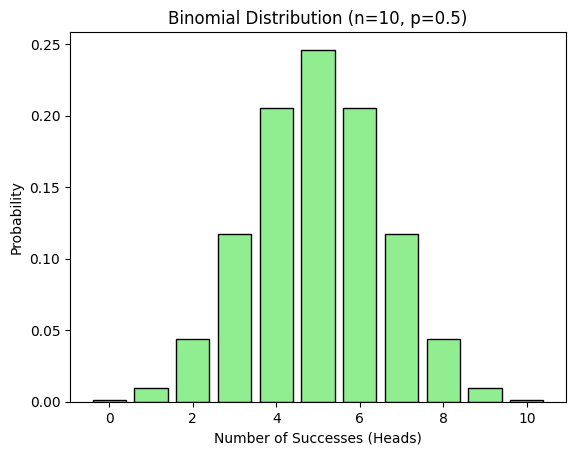

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10
p = 0.5
x = np.arange(0, n+1)

# PMF
pmf = binom.pmf(x, n, p)

# Plot
plt.bar(x, pmf, color='lightgreen', edgecolor='black')
plt.xlabel("Number of Successes (Heads)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()


Explanation:

- Shows probability of getting 0,1,2,…,10 heads

- Peaks around n*p = 5, the expected value

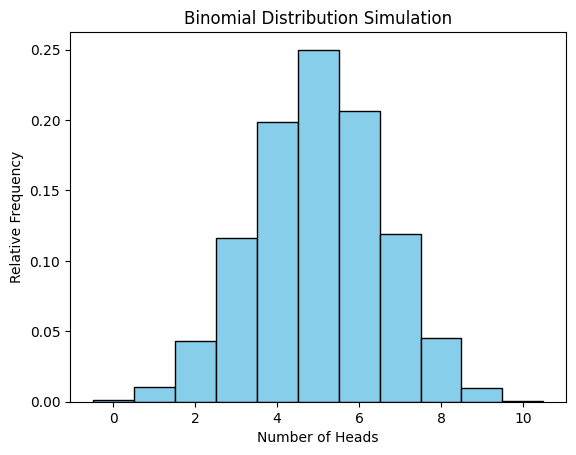

In [15]:
# Simulate 10000 experiments
samples = np.random.binomial(n=n, p=p, size=10000)

# Histogram
plt.hist(samples, bins=np.arange(-0.5,n+1.5,1), density=True, color='skyblue', edgecolor='black')
plt.xlabel("Number of Heads")
plt.ylabel("Relative Frequency")
plt.title("Binomial Distribution Simulation")
plt.show()


Explanation:

- Random trials confirm theoretical PMF

- Larger number of trials → better approximation


# **Poisson Distribution**

**Definition:**
The **Poisson distribution** models the number of **events occurring in a fixed interval of time or space**, when:

1. Events occur **independently**
2. The average rate ((\lambda)) is **constant**
3. Two events cannot occur at exactly the same instant

**PMF (Probability Mass Function):**
$$
P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0,1,2,...
$$

Where:

* $(k)$ = number of occurrences
* $(\lambda)$ = average number of occurrences per interval

---

### **Example:** Number of emails received per hour

* Average $(\lambda = 5)$ emails/hour
* Question: Probability of receiving exactly 3 emails




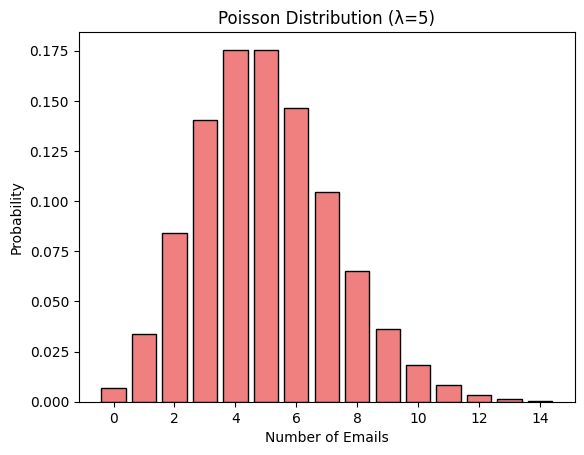

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameter
lambda_ = 5
k = np.arange(0, 15)

# PMF
pmf = poisson.pmf(k, lambda_)

# Plot
plt.bar(k, pmf, color='lightcoral', edgecolor='black')
plt.xlabel("Number of Emails")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ={lambda_})")
plt.show()


Explanation:

- Probability of 0,1,2,…,14 emails shown

- Peaks near λ = 5 (expected value)

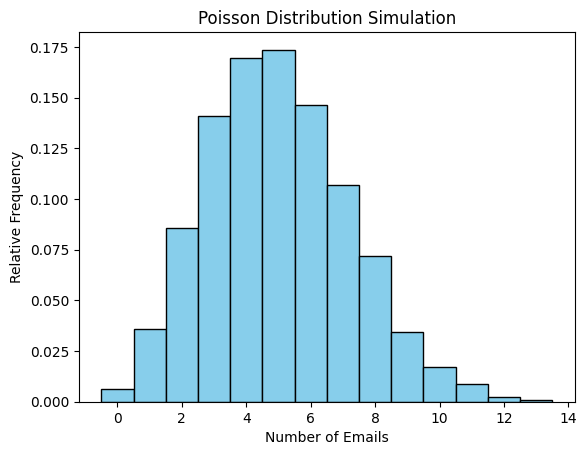

In [17]:
# Simulate 10000 hours
samples = np.random.poisson(lam=lambda_, size=10000)

plt.hist(samples, bins=np.arange(0, 15)-0.5, density=True, color='skyblue', edgecolor='black')
plt.xlabel("Number of Emails")
plt.ylabel("Relative Frequency")
plt.title("Poisson Distribution Simulation")
plt.show()


Explanation:

- Histogram closely matches theoretical PMF

- Larger number of trials → better approximation


# **Normal Distribution**

**Definition:**
The **Normal distribution** (or Gaussian distribution) is a **continuous probability distribution** characterized by its **bell-shaped curve**.

* Symmetric around the mean ($(\mu)$)
* Described by two parameters:

  * Mean ($(\mu)$) → center of the distribution
  * Standard deviation ($(\sigma)$) → spread of the distribution

**PDF (Probability Density Function):**

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

---

### **Properties:**

1. Symmetric about mean → mean = median = mode
2. ~68% of values lie within 1σ, ~95% within 2σ, ~99.7% within 3σ
3. Total area under the curve = 1



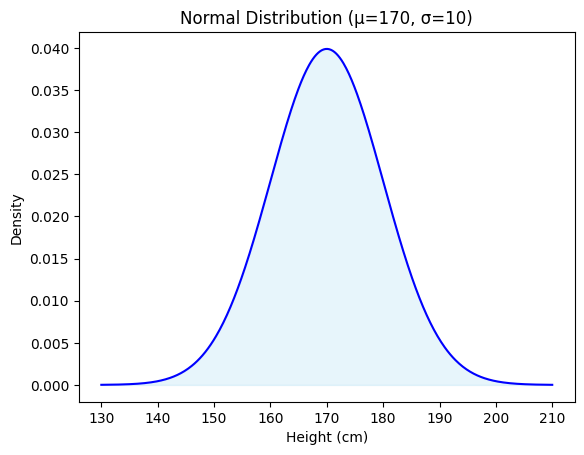

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 170      # mean height
sigma = 10    # standard deviation
x = np.linspace(130, 210, 500)

# PDF
pdf = norm.pdf(x, mu, sigma)

# Plot
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, alpha=0.2, color='skyblue')
plt.title("Normal Distribution (μ=170, σ=10)")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()


Explanation:

- Curve shows probability density of heights

- Most students’ heights cluster around the mean (170 cm)

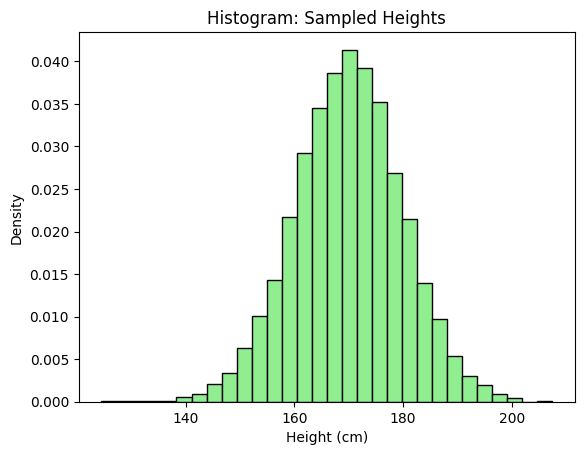

In [19]:
# Generate 10000 student heights
heights = np.random.normal(mu, sigma, size=10000)

plt.hist(heights, bins=30, density=True, color='lightgreen', edgecolor='black')
plt.title("Histogram: Sampled Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()


Explanation:

- Histogram approximates the normal distribution

- As sample size increases → histogram matches theoretical curve


# **Exponential Distribution**

**Definition:**
The **Exponential distribution** is a continuous probability distribution that models the **time between events in a Poisson process**.

* Key property: **memoryless** → probability of an event occurring in the future is **independent of past events**.
* Parameter:

  * ($\lambda$ > 0) → rate of occurrence (events per unit time)

**PDF (Probability Density Function):**
$$
f(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

**CDF (Cumulative Distribution Function):**
$$
F(x) = 1 - e^{-\lambda x}
$$

---

### **Example:** Time between customer arrivals

* Average arrival rate: λ = 0.5 customers per minute
* Question: Probability that the next customer arrives within 2 minutes




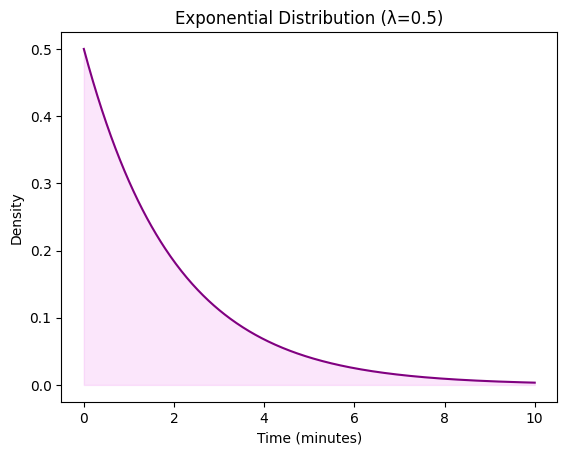

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameter
lambda_ = 0.5
scale = 1/lambda_  # scale = 1/lambda for scipy
x = np.linspace(0, 10, 500)

# PDF
pdf = expon.pdf(x, scale=scale)

# Plot
plt.plot(x, pdf, color='purple')
plt.fill_between(x, pdf, alpha=0.2, color='violet')
plt.title("Exponential Distribution (λ=0.5)")
plt.xlabel("Time (minutes)")
plt.ylabel("Density")
plt.show()


Explanation:

- Higher λ → events occur more frequently

- Curve starts high at x=0 → probability decreases as time increases

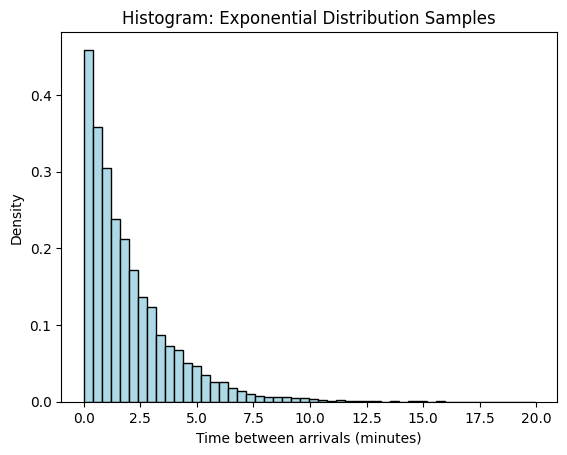

In [21]:
# Generate 10000 random arrival times
samples = np.random.exponential(scale=scale, size=10000)

plt.hist(samples, bins=50, density=True, color='lightblue', edgecolor='black')
plt.title("Histogram: Exponential Distribution Samples")
plt.xlabel("Time between arrivals (minutes)")
plt.ylabel("Density")
plt.show()


Explanation:

- Histogram approximates the exponential PDF

- Most intervals are short, fewer long intervals



# **Expectation & Variance of Random Variables**

**1. Expectation (Mean) of a Random Variable**

* **Definition:** The **expected value** of a random variable is the **long-term average** or **weighted mean** of all possible outcomes.
* Denoted as (E[X]) or ($\mu$)

---

### **Formulas:**

#### **Discrete Random Variable:**

$$
E[X] = \sum_{i} x_i \cdot P(X=x_i)
$$

#### **Continuous Random Variable:**

$$
E[X] = \int_{-\infty}^{\infty} x \cdot f(x) , dx
$$





In [23]:
import numpy as np

# Die outcomes and probabilities
x = np.array([1,2,3,4,5,6])
p = np.ones(6)/6  # uniform probability

# Expected value
E_X = np.sum(x * p)
E_X


np.float64(3.5)

### Example 2: Continuous RV (Exponential Distribution)

In [24]:
from scipy.stats import expon

lambda_ = 0.5
# Expected value for Exponential = 1/lambda
E_X = 1 / lambda_
E_X


2.0



**2. Variance of a Random Variable**

* **Definition:** Measures the **spread of a random variable around its mean**
* Denoted as ($Var(X) = \sigma^2$)

---

### **Formulas:**

#### **Discrete RV:**

$$
Var(X) = \sum_i (x_i - E[X])^2 \cdot P(X=x_i)
$$

#### **Continuous RV:**

$$
Var(X) = \int_{-\infty}^{\infty} (x - E[X])^2 f(x) dx
$$

* Standard Deviation: (\sigma = \sqrt{Var(X)})





In [25]:
Var_X = np.sum((x - E_X)**2 * p)
Var_X


np.float64(5.166666666666666)

### Example 2: Exponential Distribution Variance

In [26]:
# Variance for Exponential = 1/lambda^2
Var_X = 1 / lambda_**2
Var_X


4.0


# **Law of Large Numbers (LLN)**

**Definition:**
The **Law of Large Numbers** states that as the **number of trials** in a random experiment **increases**, the **sample mean** of the outcomes **approaches the expected value** (true mean) of the random variable.

* Connects **probability theory** with **real-world observations**
* Forms the foundation for **simulations and statistical inference**

---

### **Types of LLN:**

1. **Weak Law of Large Numbers (WLLN):**

   * Sample mean converges to expected value **in probability**
2. **Strong Law of Large Numbers (SLLN):**

   * Sample mean converges to expected value **almost surely**

---

### **Example: Dice Roll Simulation**

* A fair die: Expected value = 3.5
* Simulate multiple trials and calculate cumulative mean



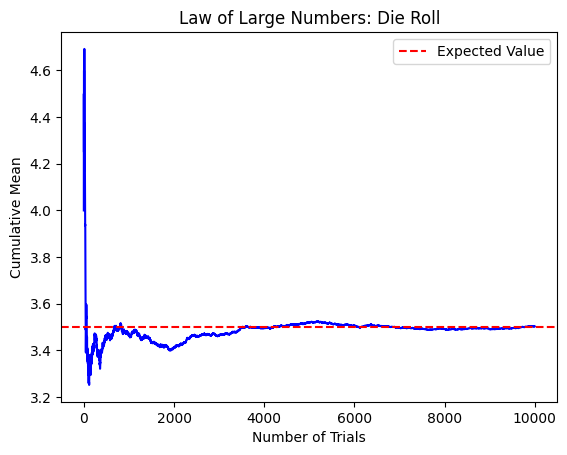

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Number of trials
trials = 10000
# Simulate die rolls
rolls = np.random.choice([1,2,3,4,5,6], size=trials)

# Cumulative mean
cumulative_mean = np.cumsum(rolls) / np.arange(1, trials+1)

# Plot
plt.plot(cumulative_mean, color='blue')
plt.axhline(y=3.5, color='red', linestyle='--', label='Expected Value')
plt.title("Law of Large Numbers: Die Roll")
plt.xlabel("Number of Trials")
plt.ylabel("Cumulative Mean")
plt.legend()
plt.show()


Explanation:

- As the number of die rolls increases, the cumulative mean approaches 3.5

- Demonstrates LLN: more trials → sample mean ≈ expected value

# **Central Limit Theorem (CLT)**

**Definition:**
The **Central Limit Theorem** states that:

> The **sampling distribution of the sample mean** approaches a **normal distribution**, regardless of the population’s original distribution, as the **sample size becomes large** (($n \ge 30$) is a common rule of thumb).

* Mean of the sampling distribution: ($\mu_{\bar{X}} = \mu$)
* Standard deviation of the sampling distribution (Standard Error): ($\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$)

---

### **Key Points:**

1. Population can be **any shape** (uniform, skewed, exponential, etc.)
2. Sample mean distribution → approximately **normal** for large n
3. Fundamental for **confidence intervals, hypothesis testing, and inferential statistics**

---

### **Example: Sampling from Exponential Distribution**

* Population: Exponential (non-normal)
* Sample size: n = 50
* Simulate 10000 sample means





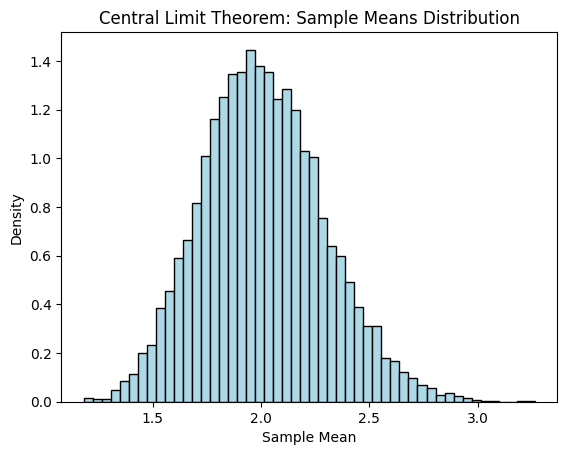

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_ = 0.5
population_size = 100000
sample_size = 50
num_samples = 10000

# Generate population
population = np.random.exponential(1/lambda_, population_size)

# Draw sample means
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Plot histogram of sample means
plt.hist(sample_means, bins=50, density=True, color='lightblue', edgecolor='black')
plt.title("Central Limit Theorem: Sample Means Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()



**Explanation:**

* Population (Exponential) → skewed
* Histogram of **sample means** → bell-shaped normal curve
* Demonstrates **CLT in action**
